In [29]:
using Pkg
Pkg.activate(".")
using Plots, DifferentialEquations, Erdos

  Activating environment at `~/Documents/simulations/Project.toml`


In [68]:
function solve_kuramoto_on(graph; T=10., solver=BS3(), reltol=1e-8, abstol=1e-8)
    n, A = nv(graph), adjacency_matrix(graph)
    ω = 2*pi .* rand(n,1)
    θ0 = 2*pi .* rand(n,1)
    ℰ(θ,p,t) = ω .- sum(sin.(θ .- transpose(θ)) .* A, dims=2)
    ode = ODEProblem(ℰ, θ0, (0.0, T)) 
    return solve(ode, solver, reltol=reltol, abstol=abstol)
end

solve_kuramoto_on (generic function with 5 methods)

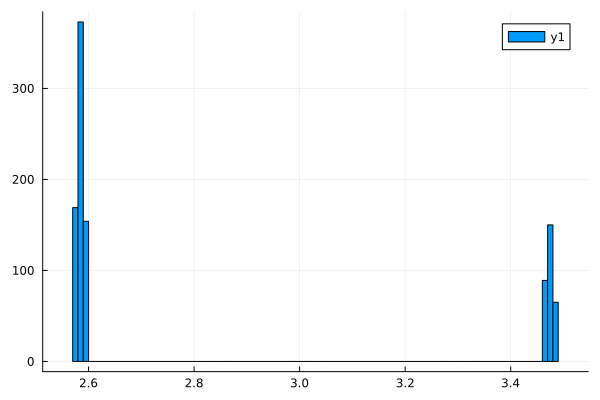

In [74]:
graph = CompleteGraph(1000)
s = solve_kuramoto_on(graph, T=10)
histogram(s(10.) .% 2*pi, nbins=100)

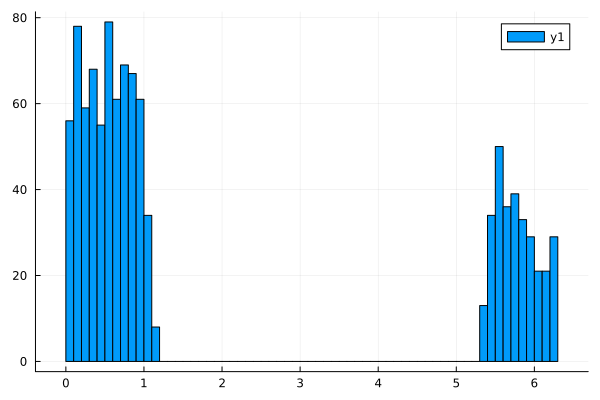

In [75]:
graph = random_regular_graph(1000,20)
s = solve_kuramoto_on(graph, T=10)
histogram(s(10.) .% 2*pi, nbins=100)

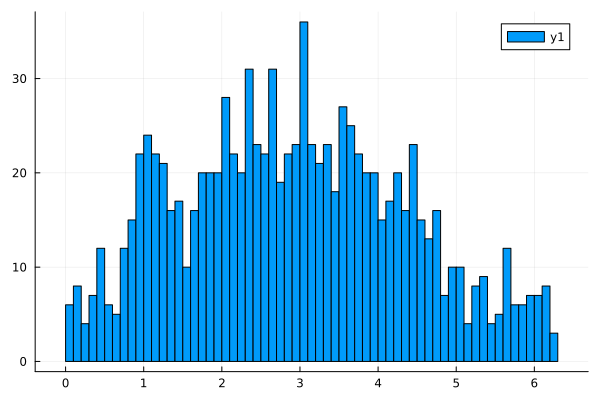

In [76]:
graph = random_regular_graph(1000, 7)
s = solve_kuramoto_on(graph, T=10)
histogram(s(10.) .% 2*pi, nbins=100)

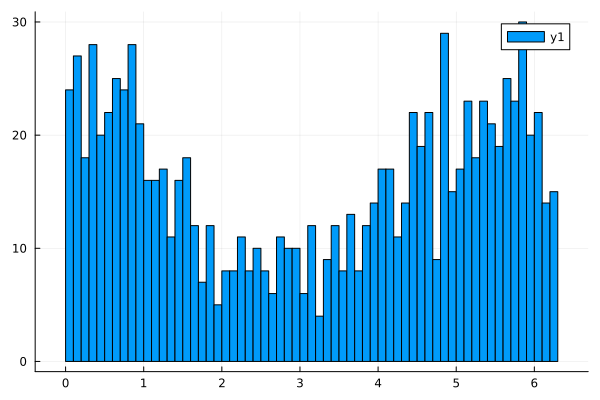

In [77]:
graph = erdos_renyi(1000, 7/1000)
s = solve_kuramoto_on(graph, T=10)
histogram(s(10.) .% 2*pi, nbins=100)